In [1]:
import qiskit
import numpy as np
import matplotlib.pyplot as plt
import qtm.base_qtm, qtm.constant, qtm.qtm_nqubit, qtm.qtm_1qubit

# Init parameters
num_qubits = 3
theta = np.random.uniform(0, 2*np.pi)
thetas = np.zeros((2*num_qubits*3))
# Init quantum tomography n qubit
qc = qiskit.QuantumCircuit(num_qubits, num_qubits)
qc = qtm.qtm_nqubit.create_ghz_state(qc, theta)
# Reduce loss value in 100 steps
thetas, loss_values_qng = qtm.base_qtm.fit(
    qc, num_steps = 40, thetas = thetas, 
    create_circuit_func = qtm.qtm_nqubit.u_cluster_nqubit, 
    grad_func = qtm.base_qtm.grad_loss,
    loss_func = qtm.base_qtm.loss_basis,
    optimizer = qtm.base_qtm.qng,
    verbose = 1
)




Step: 100%|██████████| 40/40 [01:05<00:00,  1.63s/it]


In [3]:
loss_values_qng[0:10]

[0.3812255859375,
 0.9132080078125,
 0.90478515625,
 0.8858642578125,
 0.8653564453125,
 0.83935546875,
 0.806884765625,
 0.7818603515625,
 0.751708984375,
 0.7022705078125]

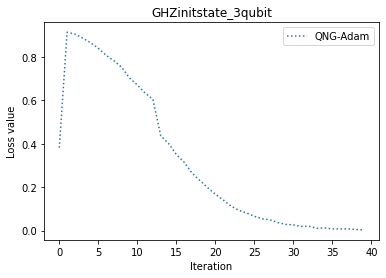

In [2]:
# Plot loss value in 100 steps

plt.plot(loss_values_qng, label='QNG-Adam', linestyle = ':')
plt.title('GHZinitstate_3qubit')
plt.legend()
plt.xlabel("Iteration")
plt.ylabel("Loss value")
plt.show() 